In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
%matplotlib inline

In [11]:
df_master = pd.read_csv("master.csv", index_col=0)
df_master.sample(5)

,County,year,CDC Week,FIPS,County Centroid,Week Ending Date,Count,Disease_INFLUENZA_A,Disease_INFLUENZA_B,Disease_INFLUENZA_UNSPECIFIED,UnempRate,GDP,GDP_change,Population,flu,fluSymptoms,fever,cough,soreThroat,Target,VaxRate,PRCP,SNOW,TAVG,TMAX,TMIN,SNOWDepth,Density,F_PRCP,F_SNOW,F_TAVG
Index_column,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7114,KINGS,2013,42,36047,"(40.6782, -73.9442)",10/19/2013,3,2,1,0,9.4,60062655.0,0.6,2588501.0,0.007260,0.000638,0.221650,0.184680,0.257920,3.0,0.420,0.004286,0.000000,60.857143,67.571429,54.142857,0.000000,36550.42360915,0.027143,0.000000,55.285714
4786,ESSEX,2017,12,36031,"(44.1089711, -73.7775726)",03/25/2017,0,0,0,0,5.5,NaN,NaN,37511.0,0.000433,0.000527,0.079347,0.053545,0.043765,4.0,0.621,0.108333,0.500000,27.714286,37.857143,17.571429,0.333333,20.9064612675,0.270000,0.000000,41.928571
8475,MONROE,2014,11,36055,"(43.174966, -77.639663)",03/15/2014,24,20,4,0,5.8,40495972.0,2.0,747425.0,0.003086,0.004643,0.282933,0.099259,0.259294,27.0,0.623,0.077500,0.214286,33.357143,42.714286,24.000000,0.000000,1137.2696702728,0.280000,0.000000,32.357143
4704,ESSEX,2013,48,36031,"(44.1089711, -73.7775726)",11/30/2013,0,0,0,0,8.3,1247372.0,6.2,38587.0,0.000260,0.000252,0.025444,0.029456,0.027134,0.0,0.505,0.320000,0.780000,24.928571,31.714286,18.142857,1.600000,21.5061614174,0.093333,1.383333,18.142857
1318,CATTARAUGUS,2011,51,36009,"(42.2448527, -78.6810055)",12/24/2011,0,0,0,0,9.3,NaN,NaN,79819.0,0.003312,0.001404,0.207081,0.186930,0.187572,0.0,NaN,0.417500,0.500000,36.250000,41.000000,29.500000,4.571429,61.0073757022,0.357143,1.625000,32.500000


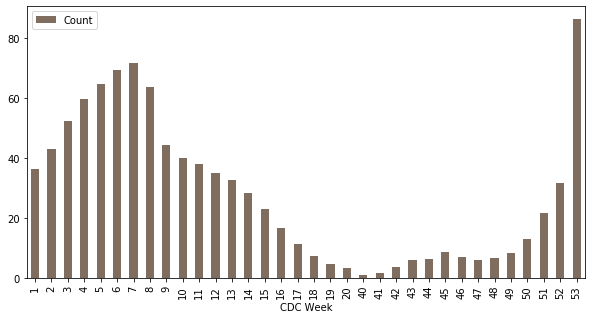

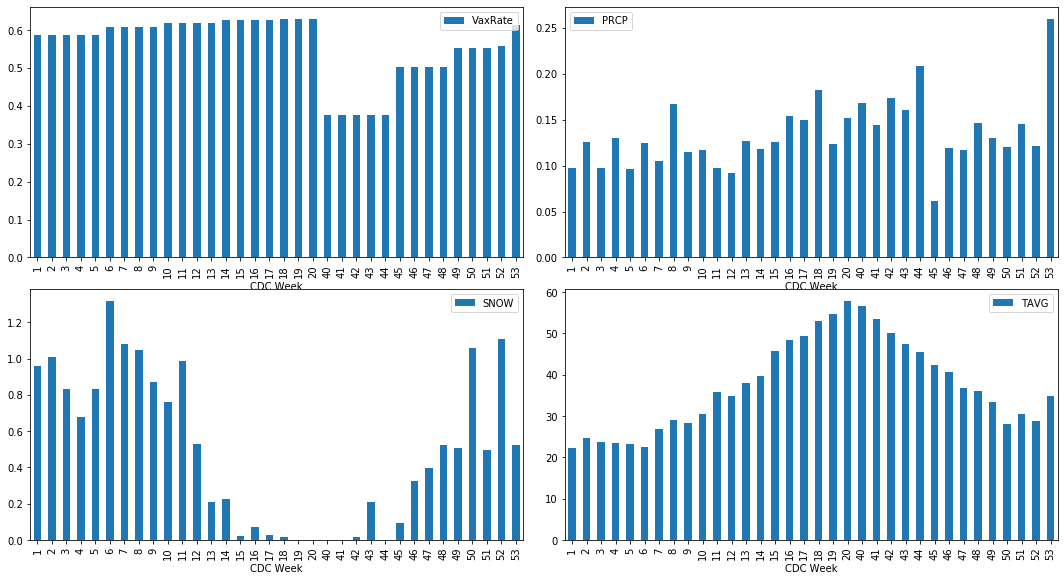

In [63]:
from math import ceil
fig, ax1 = plt.subplots(figsize=(10,5))
df_master.groupby(['CDC Week']).mean()['Count'].plot.bar(ax=ax1, legend = True, color='#7f6d5f')

monthly_feat = [ 'VaxRate', 'PRCP', 'SNOW', 'TAVG']
fig, ax = plt.subplots(nrows= ceil(len(monthly_feat)/2),ncols=2, figsize=(15,8))
#fig.title.set_text('Weekly Variation in features')
plt.tight_layout()
for i in range(len(monthly_feat)):
  df_master.groupby(['CDC Week']).mean()[monthly_feat[i]].plot.bar(ax=ax[i//2,i%2], legend = True)

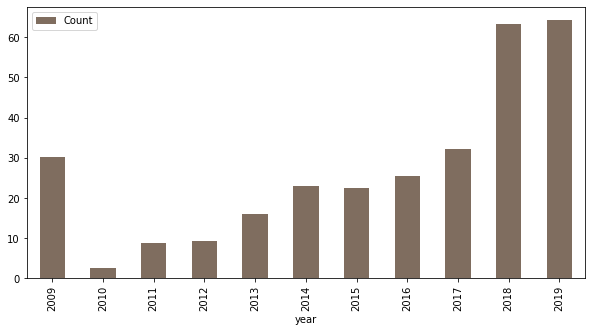

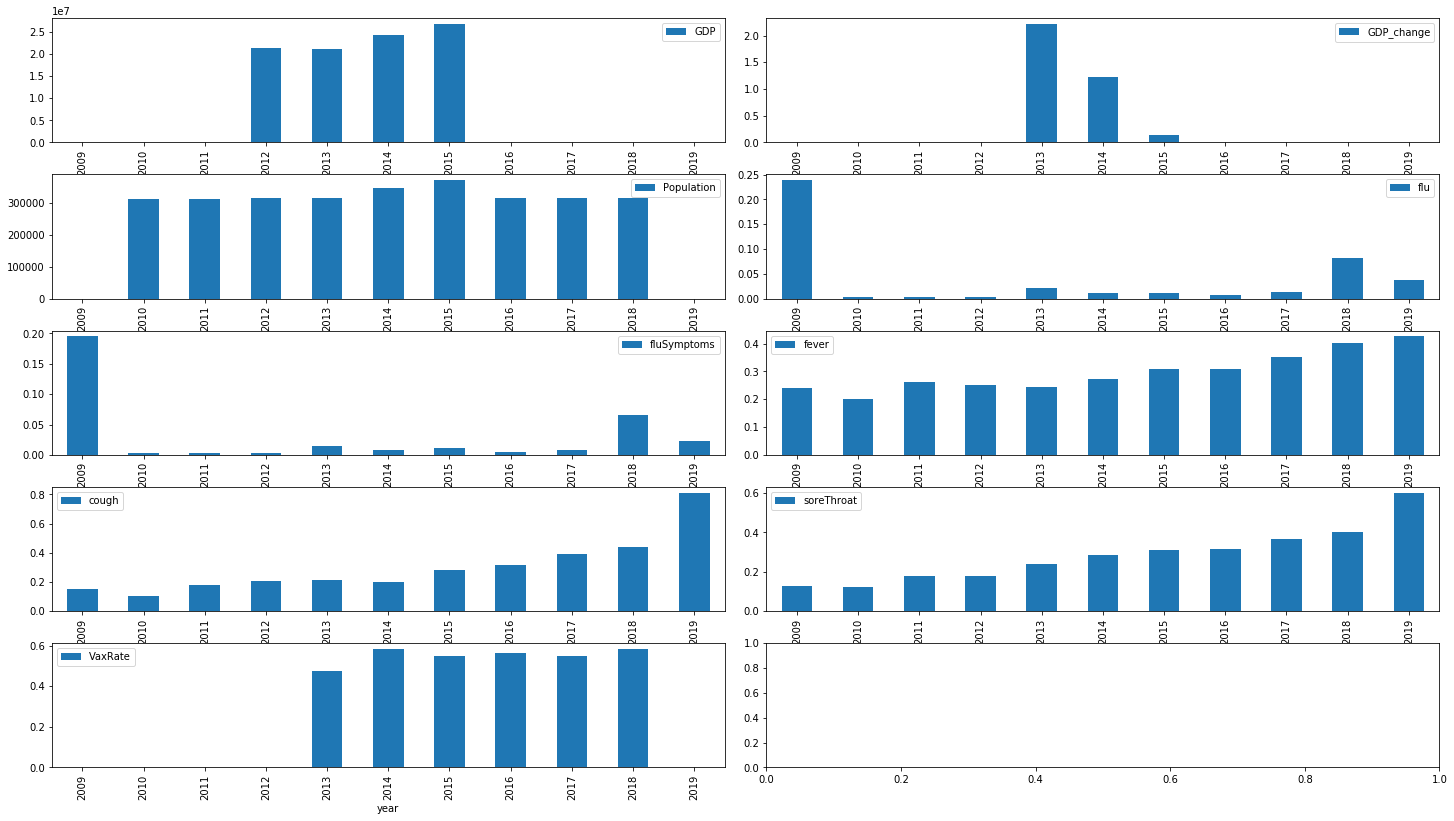

In [55]:
fig, ax1 = plt.subplots(figsize=(10,5))
df_master.groupby(['year']).mean()['Count'].plot.bar(ax=ax1, legend = True, color='#7f6d5f')

yearly_feat = [ 'GDP', 'GDP_change', 'Population', 'flu', 'fluSymptoms', 'fever', 'cough', 'soreThroat', 'VaxRate']#, list(df_master.columns)[27]]
fig, ax = plt.subplots(nrows= ceil(len(yearly_feat)/2),ncols=2, figsize=(20,11))
plt.tight_layout()
for i in range(len(yearly_feat)):
  df_master.groupby(['year']).mean()[yearly_feat[i]].plot.bar(ax=ax[i//2,i%2], legend = True)